In [1]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from optimization_algorithms import UWASNA
from datasets import generate_logistic_regression, generate_linear_regression

from config import N, n, true_theta, bias_setting, mu_list, gamma_list, e

In [ ]:
objective_function = LogisticRegression(bias=bias_setting)
optimizer_class = UWASNA
optimizer_list = [
    optimizer_class(mu=mu, generate_Z="canonic deterministic") for mu in mu_list
]

simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

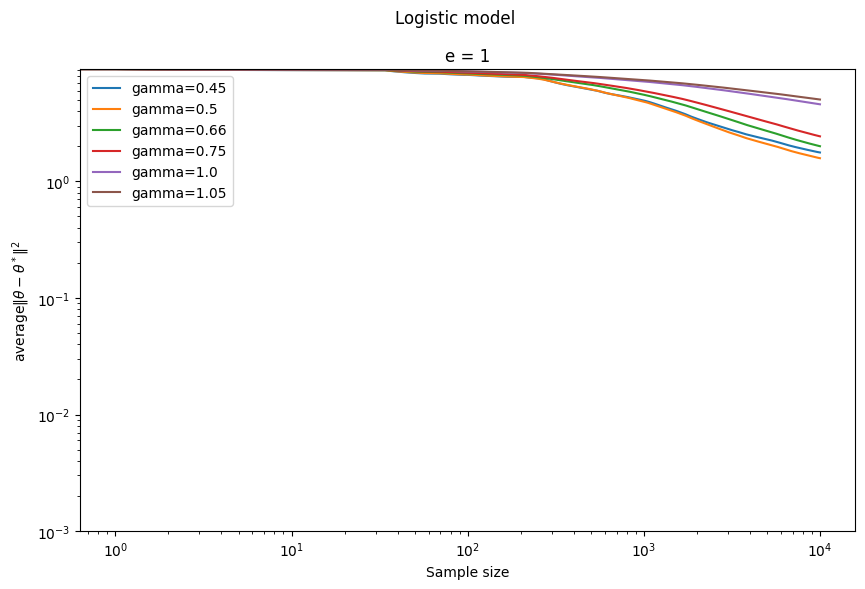

In [3]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
err, _ = simulation.run(plot=True)

Runs:   0%|          | 0/10 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

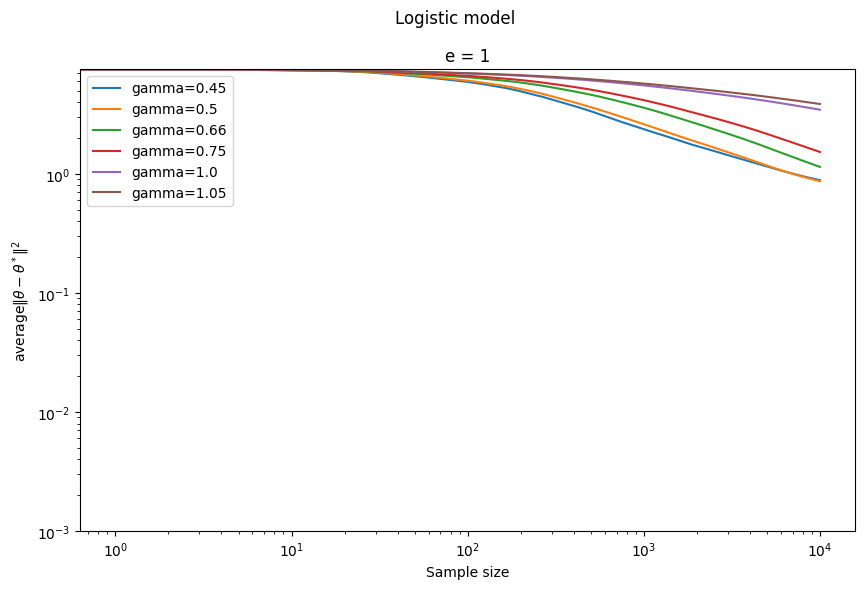

In [4]:
simulation.run_multiple_datasets(num_runs=N, n=n)

In [5]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/gs/stochastic_optimization/optimization_algorithms/UWASNA.py:126: RuntimeWarning: overflow encountered in matmul
  self.theta_not_avg += -learning_rate_theta * self.hessian_inv @ grad
/home/gs/stochastic_optimization/optimization_algorithms/UWASNA.py:126: RuntimeWarning: invalid value encountered in matmul
  self.theta_not_avg += -learning_rate_theta * self.hessian_inv @ grad
/home/gs/stochastic_optimization/optimization_algorithms/UWASNA.py:129: RuntimeWarning: overflow encountered in multiply
  theta += (self.theta_not_avg - theta) * weight_theta / self.sum_weights_theta
/home/gs/AppImage/anaconda3/envs/env/lib/python3.12/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


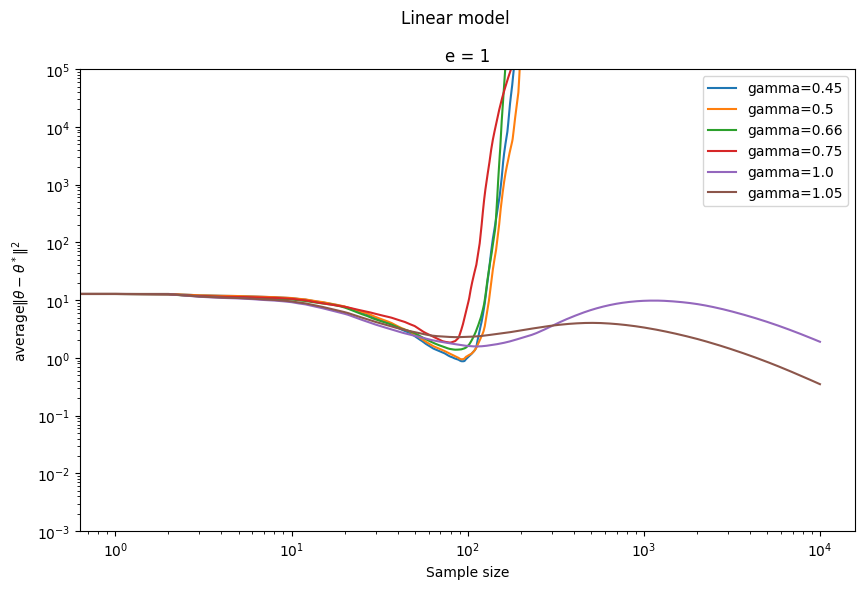

In [6]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

Runs:   0%|          | 0/10 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/gs/stochastic_optimization/optimization_algorithms/UWASNA.py:129: RuntimeWarning: invalid value encountered in subtract
  theta += (self.theta_not_avg - theta) * weight_theta / self.sum_weights_theta


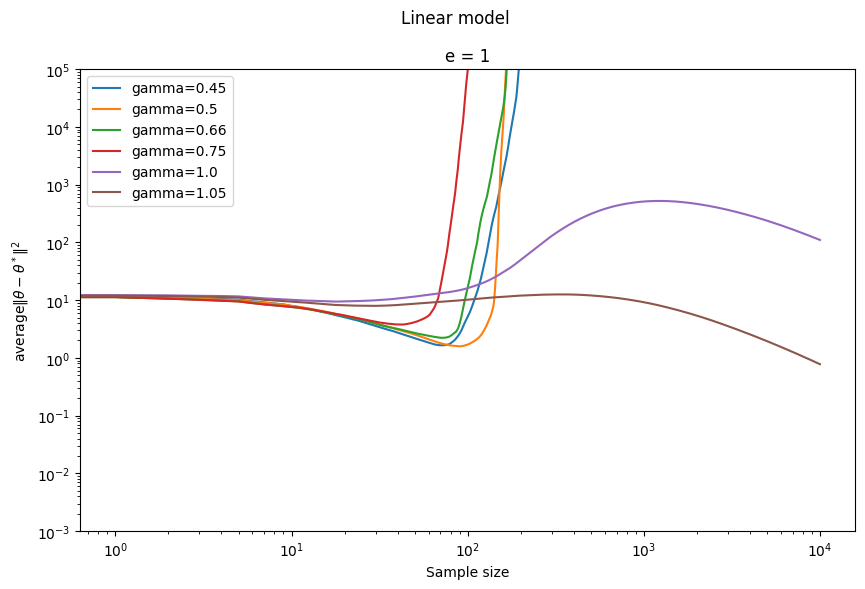

In [7]:
simulation.run_multiple_datasets(num_runs=N, n=n)